<a href="https://colab.research.google.com/github/Ranadheer-senani/DSP-Assignment1/blob/main/DSP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing and Describing Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Importing the dataset 'silver.csv' file.

silverdf = pd.read_csv("https://raw.githubusercontent.com/Ranadheer-senani/DSP-Assignment1/main/silver.csv")

In [ ]:
# Printing the first five lines from the data ti check if the dataset is imported properly.

silverdf.head(5)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,5.290,5.290,5.290,5.335,3,USD
1,2000-01-05,5.170,5.170,5.170,5.170,0,USD
2,2000-01-06,5.127,5.127,5.127,5.127,0,USD
3,2000-01-07,5.150,5.150,5.150,5.150,50,USD
4,2000-01-10,5.145,5.145,5.145,5.145,62,USD


In [ ]:
# Displaying the basic information of about the dataset.

silverdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6042 non-null   object 
 1   Open      6042 non-null   float64
 2   High      6042 non-null   float64
 3   Low       6042 non-null   float64
 4   Close     6042 non-null   float64
 5   Volume    6042 non-null   int64  
 6   Currency  6042 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 330.5+ KB


In [ ]:
# This duplicated().sum() is used to check the duplicate values present in the dataset and return the sum of duplicate values.

silverdf.duplicated().sum()

0

In [ ]:
# This isnull().sum() is used to check the null values present in the dataset and return the sum of null values.

silverdf.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
# the overall statistical information of the database.

silverdf.describe()

,Open,High,Low,Close,Volume
count,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000
mean,16.589239,16.692516,16.476471,16.743777,1762.742966
std,8.767941,8.857564,8.665565,8.779355,8709.227301
min,4.026000,4.026000,4.026000,4.026000,0.000000
25%,9.253750,9.335000,9.203750,9.310000,0.000000
50%,16.516500,16.605000,16.440000,16.953500,21.000000
75%,21.203750,21.331250,21.093750,21.335000,142.000000
max,48.460000,49.520000,47.540000,48.584000,127210.000000


## Identify Analysis tasks

##Data Cleaning and Preprocessing





In [ ]:
silverdf['Date'] = pd.to_datetime(silverdf['Date'])
silverdf['Day'] = silverdf['Date'].dt.day_name()
silverdf['Year'] = pd.DatetimeIndex(silverdf['Date']).year
silverdf['Month'] = pd.DatetimeIndex(silverdf['Date']).month

## Exploratory Data Analysis


In [ ]:
# Sorting the values according to the volumes of the silver sold.

print(silverdf.sort_values('Volume',ascending=False)[:10])

           Date    Open    High     Low   Close  Volume Currency        Day  \
5992 2022-03-08  25.805  27.495  25.550  26.895  127210      USD    Tuesday   
5809 2021-08-06  25.195  25.230  24.205  24.326  113947      USD     Friday   
4468 2016-04-19  16.968  16.968  16.968  17.788  107564      USD    Tuesday   
4889 2017-08-28  17.431  17.431  17.431  18.877   99635      USD     Monday   
5902 2021-11-23  24.210  24.340  23.280  23.435   93870      USD    Tuesday   
5982 2022-02-24  24.650  25.705  23.880  24.710   90870      USD   Thursday   
5844 2021-09-16  23.865  24.000  22.585  22.794   90198      USD   Thursday   
5793 2021-07-19  25.700  25.805  25.035  25.309   86385      USD     Monday   
4421 2016-02-24  15.292  15.292  15.292  16.106   83784      USD  Wednesday   
5875 2021-10-22  24.220  24.920  24.185  24.449   83276      USD     Friday   

      Year  Month  
5992  2022      3  
5809  2021      8  
4468  2016      4  
4889  2017      8  
5902  2021     11  
5982  2022

In [ ]:
# Value counting of the currency column in the dataset.

silverdf['Currency'].value_counts()

USD    6042
Name: Currency, dtype: int64

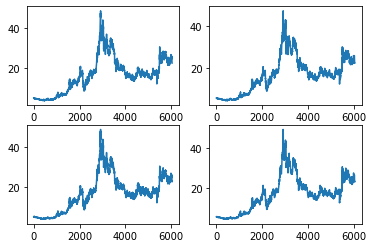

In [ ]:
# plotting the subplots of the selling price columns in the dataset.

axs,fig = plt.subplots(2,2)
fig[0,0].plot(silverdf['Open'])
fig[1,0].plot(silverdf['Close'])
fig[1,1].plot(silverdf['High'])
fig[0,1].plot(silverdf['Low'])

In [ ]:
# Styling the output table.

corr = silverdf.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Open,High,Low,Close,Volume,Year,Month
Open,1.000000,0.999759,0.999515,0.998309,0.104379,0.636214,-0.000550
High,0.999759,1.000000,0.999320,0.998424,0.106137,0.634156,-0.001008
Low,0.999515,0.999320,1.000000,0.998660,0.102264,0.639002,-0.000646
Close,0.998309,0.998424,0.998660,1.000000,0.104739,0.651979,0.000804
Volume,0.104379,0.106137,0.102264,0.104739,1.000000,0.204197,-0.003778
Year,0.636214,0.634156,0.639002,0.651979,0.204197,1.000000,-0.036889
Month,-0.000550,-0.001008,-0.000646,0.000804,-0.003778,-0.036889,1.000000


In [ ]:
#We used heatmap to check the correlation of the column ‘Volume’ with the other columns.
#With the resultant visual representation, we can conclude that the column ‘Volume’ is independent 
#of all other columns present in the dataset i.e. change in any of the other columns will not affect the values in the ‘Volume’ column. 

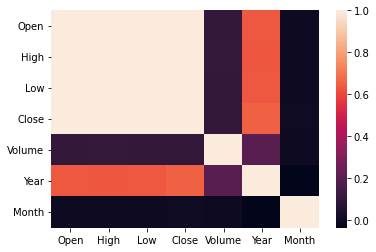

In [ ]:
sns.heatmap(silverdf.corr())

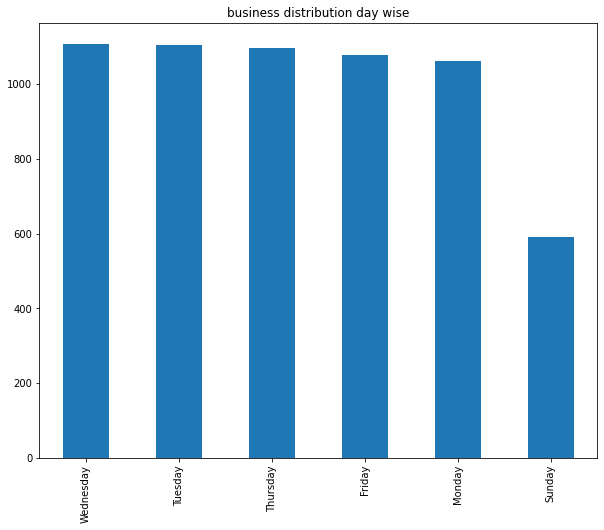

In [ ]:
# The next task is to determine the demand and supply of silver days. Through this, it can be inferred which days see the highest and lowest sales of silver.
# A bar chart is used for plotting in order to compare the amount of silver sold each day.
# The values can also be sorted in descending order so as to get the highest amount of silver sold first along with the day it is sold most on.

(silverdf['Day'].value_counts()).plot(kind='bar',figsize=(10,8),title="business distribution day wise")

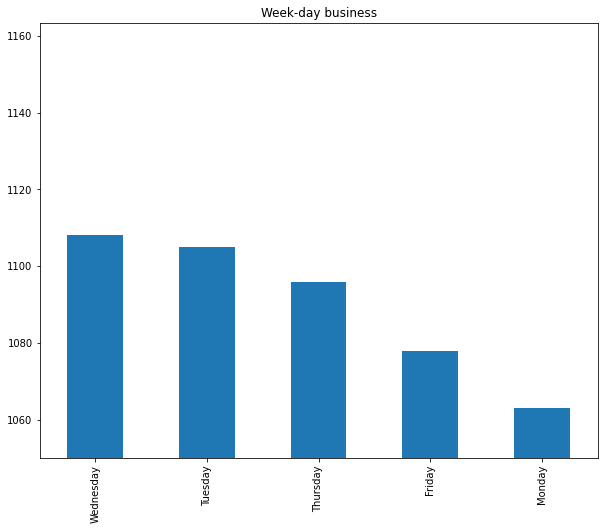

In [ ]:
# The next task also uses a bar chart since a bar chart describes the comparisons between the discrete categories.
# The values are sorted so that the order in which silver is sold the most to least is maintained.

(silverdf['Day'].value_counts()[:-1]).plot(kind='bar',figsize=(10,8),ylim=1050,title="Week-day business")

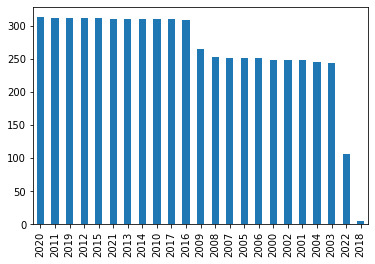

In [ ]:
# The datetime library is used to extract the year from the ‘Date’ column and plotted a bar chart to represent the price of silver over the years, from 2000 to 2022.
# The value of the cost of silver was sorted so that the year that had the highest cost price of silver came first.

silverdf['Date'] = pd.to_datetime(silverdf['Date'])
(silverdf['Date'].dt.year).value_counts().plot(kind='bar')

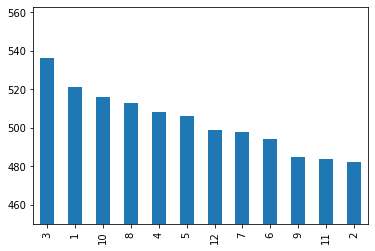

In [ ]:
# The values were again sorted for better contemplation and the datetime library was used to extract the month.

(silverdf['Date'].dt.month).value_counts().plot(kind='bar',ylim=450)

In [ ]:
# The statistics of business performed on different days of the week, months, and years are found.
# pivot_table function on index Day with an aggregation function sum does the job to find 
# The extent of transactions done on the data frame.

pd.pivot_table(silverdf,index=['Day'],aggfunc='sum')

,Close,High,Low,Month,Open,Volume,Year
Day,,,,,,,
Friday,17439.053,17373.263,17125.568,6964,17253.095,2434658,2167285
Monday,17398.327,17331.004,17105.095,6952,17223.894,1869121,2137297
Sunday,13039.283,13087.962,12981.229,3827,13032.578,0,1193094
Thursday,17698.016,17633.122,17377.650,7034,17517.683,2465831,2203442
Tuesday,17778.888,17706.060,17463.131,7127,17588.246,1980951,2221481
Wednesday,17812.334,17724.768,17498.162,7142,17616.688,1899932,2227505


In [ ]:
# It is observed that there is no Volume of silver transactions done on Sunday and there is no silver stock put into the market on Saturdays.

pd.pivot_table(silverdf,index=['Year'],aggfunc='sum')

,Close,High,Low,Month,Open,Volume
Year,,,,,,
2000,1236.369,1238.599,1234.304,1623,1236.324,118313
2001,1081.196,1083.064,1078.824,1603,1080.344,81093
2002,1144.282,1147.169,1141.224,1620,1143.965,56188
2003,1193.541,1196.762,1190.362,1584,1193.532,47733
2004,1646.413,1653.580,1638.510,1617,1646.478,97928
2005,1837.355,1843.130,1830.745,1646,1837.070,133617
2006,2899.067,2915.804,2881.428,1640,2898.314,115615
2007,3370.804,3379.887,3358.292,1644,3370.377,113894
2008,3781.622,3819.292,3748.737,1654,3789.437,141198


In [ ]:
# It can be observed that there is no trend in silver for the market in the year 2018, which is an anomaly in the dataset.

pd.pivot_table(silverdf,index=['Month'],aggfunc='sum')

,Close,High,Low,Open,Volume,Year
Month,,,,,,
1,8630.736,8594.582,8500.801,8545.023,261675,1047973
2,8213.661,8186.310,8099.381,8137.969,1085112,969451
3,9060.567,9066.036,8908.360,8995.857,982765,1078026
4,8702.889,8674.119,8589.234,8630.760,1829099,1021744
5,8309.949,8319.060,8150.126,8245.142,150289,1017462
6,7956.492,7927.034,7846.068,7889.378,1062371,993281
7,8204.834,8206.561,8081.604,8142.374,891809,1001390
8,8626.608,8569.970,8489.407,8529.058,1378957,1031430
9,8365.840,8354.292,8199.893,8290.873,630598,975258


In [ ]:
# The business over months is almost equally distributed except in the months of December and January which are the end and the beginning of the western financial year.
 
pd.pivot_table(silverdf,index=['Year','Month','Day'],aggfunc='sum')

Close     High     Low    Open  Volume
Year Month Day                                               
2000 1     Friday     20.791   20.791  20.791  20.791      51
           Monday     15.687   15.687  15.687  15.687     262
           Thursday   20.843   20.819  20.819  20.819      48
           Tuesday    20.889   20.889  20.889  20.889       5
           Wednesday  20.655   20.655  20.655  20.655     116
...                      ...      ...     ...     ...     ...
2022 4     Wednesday  99.427  100.085  98.195  99.155  113594
     5     Monday     22.584   22.880  22.130  22.785       0
           Sunday     22.825   22.907  22.755  22.797       0
           Tuesday    22.665   22.890  22.440  22.700       0
           Wednesday  23.054   23.139  22.223  22.635       0

[1428 rows x 5 columns]

In [ ]:
#Use of resample function to get the highest and lowest prices of silver in the frequency of a month

In [ ]:
# The last data analysis task is to find the lowest and highest prices of silver in the frequency of a month.

silverdf['Date'] = pd.to_datetime(silverdf['Date'])
silverdf = silverdf.set_index('Date')
silverdf

,Open,High,Low,Close,Volume,Currency,Day,Year,Month
Date,,,,,,,,,
2000-01-04,5.290,5.290,5.290,5.335,3,USD,Tuesday,2000,1
2000-01-05,5.170,5.170,5.170,5.170,0,USD,Wednesday,2000,1
2000-01-06,5.127,5.127,5.127,5.127,0,USD,Thursday,2000,1
2000-01-07,5.150,5.150,5.150,5.150,50,USD,Friday,2000,1
2000-01-10,5.145,5.145,5.145,5.145,62,USD,Monday,2000,1
...,...,...,...,...,...,...,...,...,...
2022-04-29,23.230,23.650,22.710,23.085,55325,USD,Friday,2022,4
2022-05-01,22.797,22.907,22.755,22.825,0,USD,Sunday,2022,5
2022-05-02,22.785,22.880,22.130,22.584,0,USD,Monday,2022,5


In [ ]:
silverdf.resample('3T').sum()

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2000-01-04 00:00:00,5.290,5.290,5.290,5.335,3,2000,1
2000-01-04 00:03:00,0.000,0.000,0.000,0.000,0,0,0
2000-01-04 00:06:00,0.000,0.000,0.000,0.000,0,0,0
2000-01-04 00:09:00,0.000,0.000,0.000,0.000,0,0,0
2000-01-04 00:12:00,0.000,0.000,0.000,0.000,0,0,0
...,...,...,...,...,...,...,...
2022-05-03 23:48:00,0.000,0.000,0.000,0.000,0,0,0
2022-05-03 23:51:00,0.000,0.000,0.000,0.000,0,0,0
2022-05-03 23:54:00,0.000,0.000,0.000,0.000,0,0,0


In [ ]:
# The indexing of the data frame has been changed to use the Date column. 
# The data has been resampled in the frequency of a month’s period by taking an average of each day’s values in that period.

resampler = silverdf.resample('MS').mean()
resampler

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2000-01-01,5.202158,5.202158,5.202158,5.203421,25.368421,2000.0,1.0
2000-02-01,5.243150,5.252900,5.240400,5.256100,871.250000,2000.0,2.0
2000-03-01,5.076870,5.101000,5.058174,5.069565,129.391304,2000.0,3.0
2000-04-01,5.069579,5.072211,5.066158,5.074474,911.736842,2000.0,4.0
2000-05-01,5.011136,5.035682,4.988409,5.010682,119.272727,2000.0,5.0
...,...,...,...,...,...,...,...
2022-01-01,23.212923,23.413885,22.965500,23.207346,399.576923,2022.0,1.0
2022-02-01,23.555375,23.859667,23.320083,23.638750,8895.500000,2022.0,2.0
2022-03-01,25.539370,25.886667,25.131370,25.505519,32136.370370,2022.0,3.0


In [ ]:
# The maximum value in each column is retrieved over all months.
resampler.max()

Open         42.60212
High         43.13608
Low          42.28772
Close        42.74276
Volume    33021.76000
Year       2022.00000
Month        12.00000
dtype: float64

In [ ]:
# Selecting the maximum of each column and type-casting to a data frame.

rdf = resampler.idxmax().to_frame()

In [ ]:
# Retrieving the months resulting maximum values of each attribute.

pd.DatetimeIndex(rdf[0]).month

Int64Index([4, 4, 4, 4, 7, 1, 12], dtype='int64', name=0)

In [ ]:
# Difference between open and close prices and return the lowest difference date.
# To do this task, the method is broken into four parts.

In [ ]:
# Part 1: Making a new column in the data with the difference between the "Open" and "Close" columns.

silverdf['Open_Close_diff']=silverdf['Open']-silverdf['Close']
silverdf

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff
Date,,,,,,,,,,
2000-01-04,5.290,5.290,5.290,5.335,3,USD,Tuesday,2000,1,-0.045
2000-01-05,5.170,5.170,5.170,5.170,0,USD,Wednesday,2000,1,0.000
2000-01-06,5.127,5.127,5.127,5.127,0,USD,Thursday,2000,1,0.000
2000-01-07,5.150,5.150,5.150,5.150,50,USD,Friday,2000,1,0.000
2000-01-10,5.145,5.145,5.145,5.145,62,USD,Monday,2000,1,0.000
...,...,...,...,...,...,...,...,...,...,...
2022-04-29,23.230,23.650,22.710,23.085,55325,USD,Friday,2022,4,0.145
2022-05-01,22.797,22.907,22.755,22.825,0,USD,Sunday,2022,5,-0.028
2022-05-02,22.785,22.880,22.130,22.584,0,USD,Monday,2022,5,0.201


In [ ]:
# Part 2: Finding the minimum and maximum values of the new column, "Open_Close_diff".

mn=silverdf['Open_Close_diff'].min()
mn

-2.091000000000001

In [ ]:
m=silverdf['Open_Close_diff'].max()
m

6.4190000000000005

In [ ]:
# Part 3: Locating the date, which is the index of the data, of the respective minimum and maximum values.

silverdf['Open_Close_diff'].idxmin()

Timestamp('2016-09-06 00:00:00')

In [ ]:
silverdf['Open_Close_diff'].idxmax()

Timestamp('2011-09-23 00:00:00')

In [ ]:
# Part 4: Assigning the variables and return the respective dates.

silverdf.loc[silverdf['Open_Close_diff'] == m]

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff
Date,,,,,,,,,,
2011-09-23,36.47,36.53,30.275,30.051,293,USD,Friday,2011,9,6.419


In [ ]:
silverdf.loc[silverdf['Open_Close_diff'] == mn]

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff
Date,,,,,,,,,,
2016-09-06,19.395,20.1,19.315,21.486,825,USD,Tuesday,2016,9,-2.091


In [ ]:
# Difference between high and low prices and return the lowest difference date.
# To do this task, the method is broken into four parts.

In [ ]:
# Part 1: Making a new column in the data with the difference between the "Low" and "High" columns.

silverdf['Low_High_diff']=silverdf['High']-silverdf['Low']
silverdf

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff,Low_High_diff
Date,,,,,,,,,,,
2000-01-04,5.290,5.290,5.290,5.335,3,USD,Tuesday,2000,1,-0.045,0.000
2000-01-05,5.170,5.170,5.170,5.170,0,USD,Wednesday,2000,1,0.000,0.000
2000-01-06,5.127,5.127,5.127,5.127,0,USD,Thursday,2000,1,0.000,0.000
2000-01-07,5.150,5.150,5.150,5.150,50,USD,Friday,2000,1,0.000,0.000
2000-01-10,5.145,5.145,5.145,5.145,62,USD,Monday,2000,1,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,23.230,23.650,22.710,23.085,55325,USD,Friday,2022,4,0.145,0.940
2022-05-01,22.797,22.907,22.755,22.825,0,USD,Sunday,2022,5,-0.028,0.152
2022-05-02,22.785,22.880,22.130,22.584,0,USD,Monday,2022,5,0.201,0.750


In [ ]:
# Part 2: Finding the minimum and maximum values of the new column, "Low_High_diff".

min=silverdf['Low_High_diff'].min()
min

-0.6539999999999964

In [ ]:
max=silverdf['Low_High_diff'].max()
max

6.255000000000003

In [ ]:
# Part 3: Locating the date, which is the index of the data, of the respective minimum and maximum values.

silverdf['Low_High_diff'].idxmin()

Timestamp('2011-10-12 00:00:00')

In [ ]:
silverdf['Low_High_diff'].idxmax()

Timestamp('2011-09-23 00:00:00')

In [ ]:
# Part 4: Assigning the variables and return the respective dates.

silverdf.loc[silverdf['Low_High_diff'] == min]

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff,Low_High_diff
Date,,,,,,,,,,,
2011-10-12,32.754,32.1,32.754,32.754,0,USD,Wednesday,2011,10,0.0,-0.654


In [ ]:
silverdf.loc[silverdf['Low_High_diff'] == max]

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff,Low_High_diff
Date,,,,,,,,,,,
2011-09-23,36.47,36.53,30.275,30.051,293,USD,Friday,2011,9,6.419,6.255


In [ ]:
# Returning a record of lowest and highest price dates

In [ ]:
highest=silverdf['High'].max()
silverdf.loc[silverdf['High'] == highest]

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff,Low_High_diff
Date,,,,,,,,,,,
2011-04-28,47.825,49.52,47.245,47.52,40534,USD,Thursday,2011,4,0.305,2.275


In [ ]:
lowest=silverdf['Low'].min()
silverdf.loc[silverdf['Low']==lowest]

,Open,High,Low,Close,Volume,Currency,Day,Year,Month,Open_Close_diff,Low_High_diff
Date,,,,,,,,,,,
2001-11-26,4.026,4.026,4.026,4.026,0,USD,Monday,2001,11,0.0,0.0


##Data Visualisation

In [ ]:
# To depict the legend of the "Open" and "Close" prices in silver sales. 
# Used a plot that draws a line from point to point of the values.

Text(0.5, 1.0, 'Open and Close Prices')

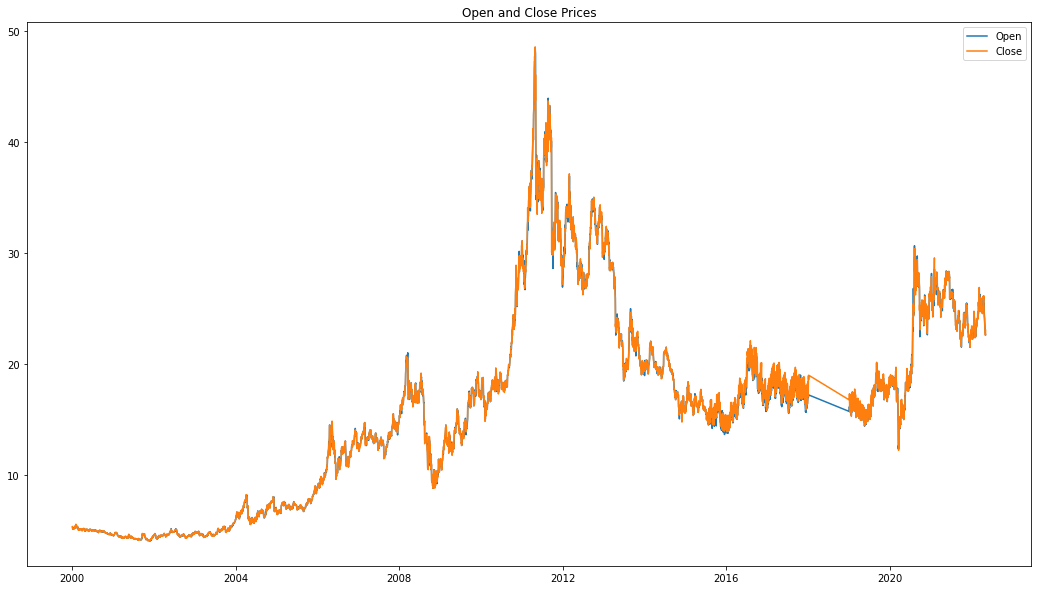

In [ ]:
plt.figure(figsize = (18,10))
plt.plot(silverdf['Open'])
plt.plot(silverdf['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close Prices')

In [ ]:
# To depict the legend of the "Low" and "High" prices in silver sales. 
# Used a plot that draws a line from point to point of the values.

Text(0.5, 1.0, 'High and Low Prices of Silver')

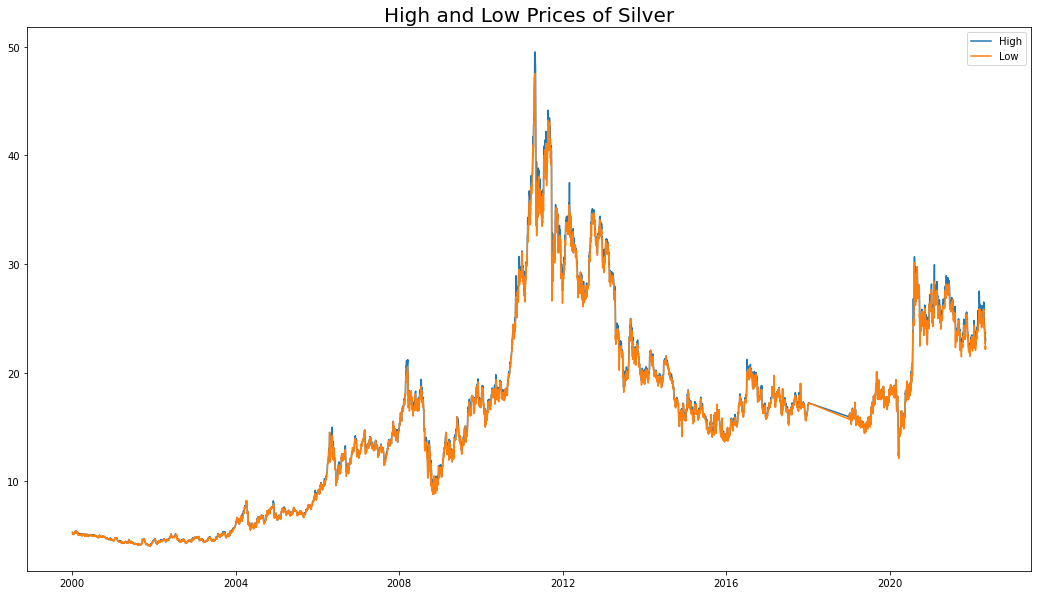

In [ ]:
plt.figure(figsize = (18,10))
plt.plot(silverdf['High'])
plt.plot(silverdf['Low'])
plt.legend(['High','Low'])
plt.title('High and Low Prices of Silver', fontsize =20)

In [ ]:
# To depict the usage or the volume of the silver sold.
# Since we’ve understood that the volume of silver sold has no relation to the other columns in the data frame, it only varies with time.

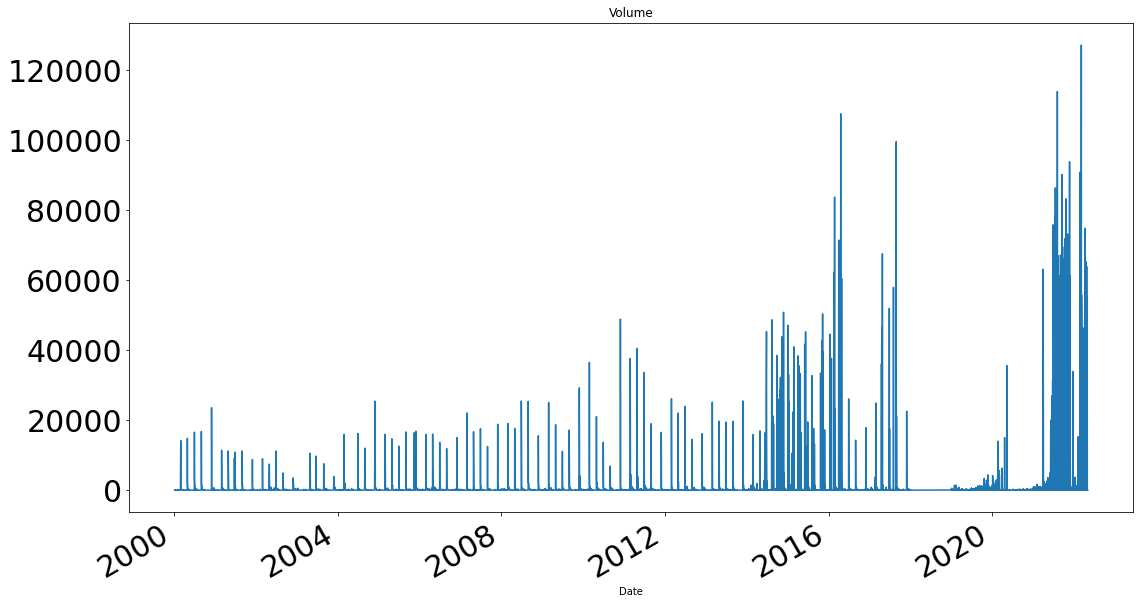

In [ ]:
silverdf['Volume'].plot(title='Volume',figsize=(18,10),fontsize=30)

In [ ]:
# While subtraction, subtract the current value of the closing price of silver and the value in the row above it. 
#bWith this, it can be checked if there’s been an increase in the closing price the next day or a decrease. 
#The last value will remain, NaN, as it has no value to subtract from. 

silverdf['PriceDiff'] = silverdf['Close'].shift(-1) - silverdf['Close']
silverdf['PriceDiff']

Date
2000-01-04   -0.165
2000-01-05   -0.043
2000-01-06    0.023
2000-01-07   -0.005
2000-01-10    0.005
              ...  
2022-04-29   -0.260
2022-05-01   -0.241
2022-05-02    0.081
2022-05-03    0.389
2022-05-04      NaN
Name: PriceDiff, Length: 6042, dtype: float64

Text(0.5, 1.0, 'Price Difference and Close Price of Silver')

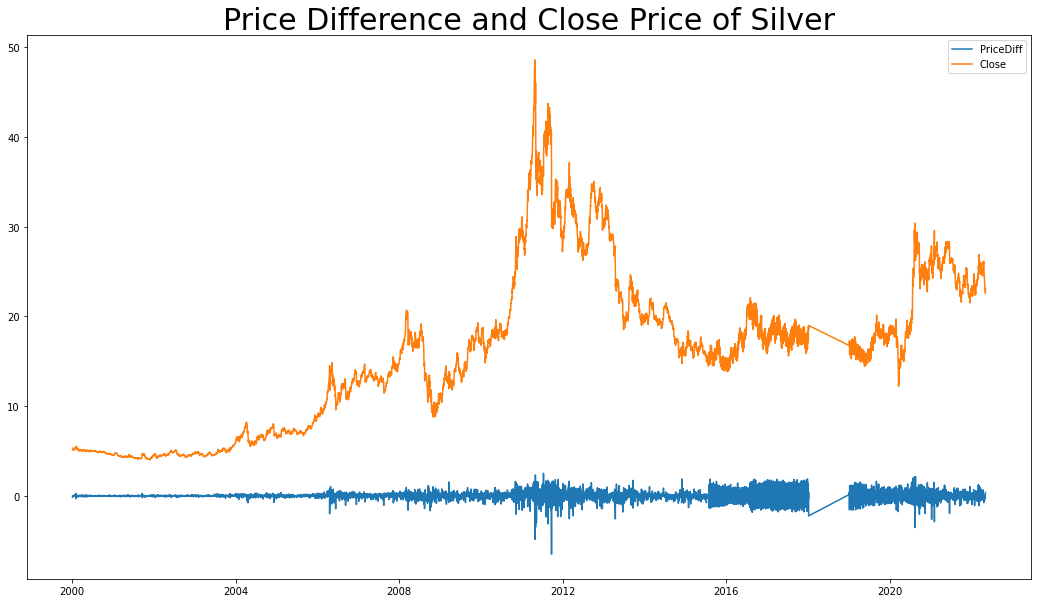

In [ ]:
# Now plotting the closing price values with the price difference column for further visualization. 
# As the closing price increases, the price difference must decrease and vice versa.

plt.figure(figsize = (18,10))
plt.plot(silverdf['PriceDiff'])
plt.plot(silverdf['Close'])
plt.legend(['PriceDiff','Close'])
plt.title('Price Difference and Close Price of Silver',fontsize = 30)

In [ ]:
dfs = silverdf.drop(columns=['Currency','Day'])

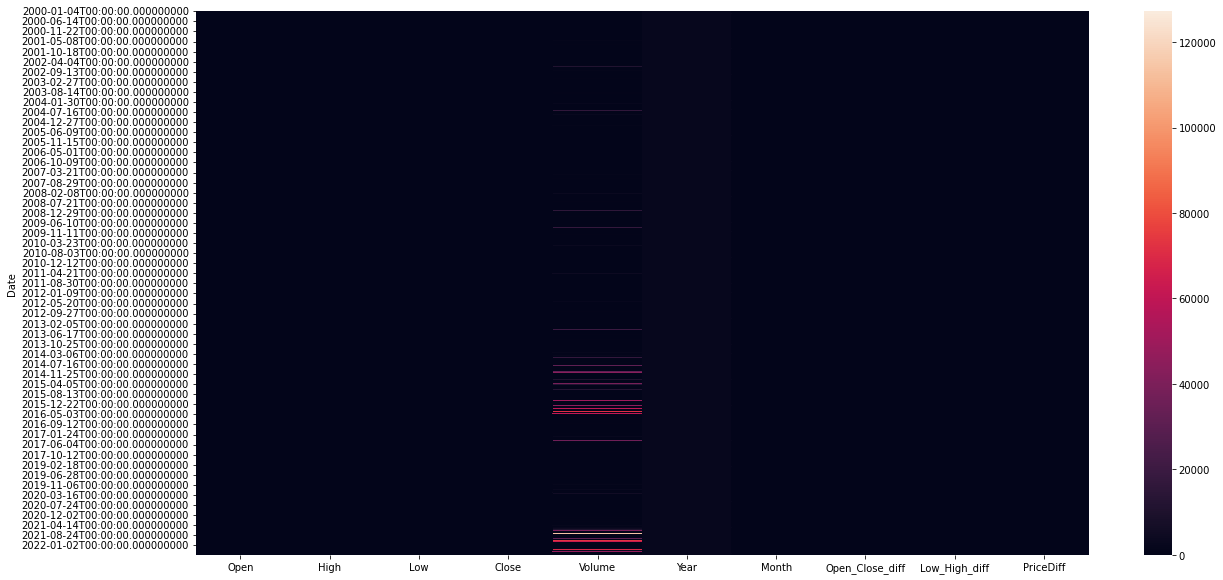

In [ ]:
# With dates as an index, the volume shows variation with time while the other variables don’t.

plt.figure(figsize=(20,10))
sns.heatmap(dfs)
plt.show()

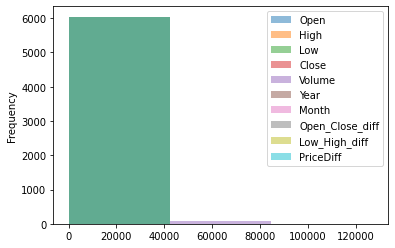

In [ ]:
#vThe following histogram also represents the independence of volume with the other variables of the data frame. 
# It also majorly represents the frequency of the difference between opening and closing prices of silver. 

silverdf.plot.hist(bins=3, alpha=0.5)

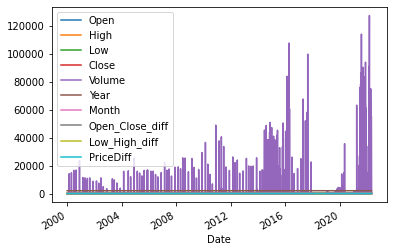

In [ ]:
# The following graph also represents how all the variables in the data frame vary with time and how volume has no correlation with the other variables in the data frame.

silverdf.plot.line()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fcf904f50>,
      dtype=object)

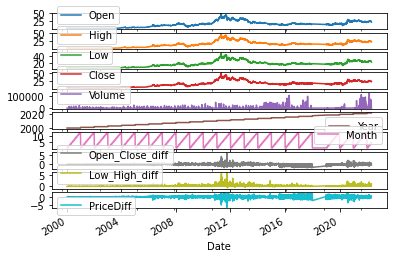

In [ ]:
silverdf.plot.line(subplots=True)

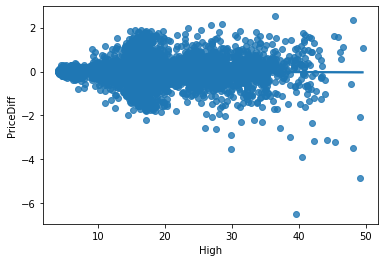

In [ ]:
# Since this dataset can be used for regression, we can visualize it using regression tools provided by the seaborn library. 
# The highest prices of silver were taken on X-axis and the price difference was taken on the Y-axis. 
# All the common points were plotted and a linear line was chosen as the best fit.

sns.regplot(x = 'High', y = 'PriceDiff', data = silverdf)

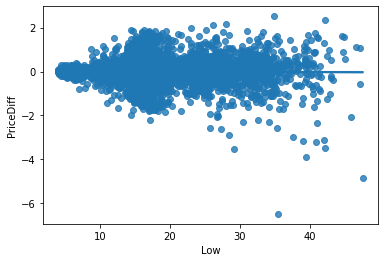

In [ ]:
# Similarly, the same regression plot was made for the lowest prices and the price difference of silver, and a linear line was drawn as the best fit line. 

sns.regplot(x = 'Low', y = 'PriceDiff', data = silverdf)